In [1]:
#import mnist
from sklearn.datasets.base import get_data_home
print(get_data_home())
from sklearn.datasets import fetch_mldata

C:\Users\Yasser Makram\scikit_learn_data


In [2]:
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)

In [4]:
fetch_mnist()
mnist = fetch_mldata('MNIST original')

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
%matplotlib inline

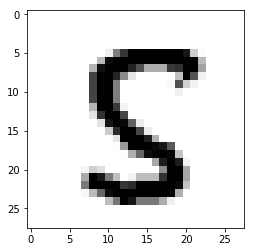

In [15]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[42]
some_digit = X_train[y_train_5][4]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
import numpy as np
shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_idx], y_train[shuffle_idx]

In [12]:
y_train_5_idx, y_train_not_5_idx = y_train[:]==5, y_train[:]!=5
X_train_5, y_train_5 = X_train[y_train_5_idx], y_train[y_train_5_idx]
X_train_not_5, y_train_not_5 = X_train[y_train_not_5_idx], y_train[y_train_not_5_idx]
y_train_5.shape, y_train_not_5.shape

((5421,), (54579,))

In [14]:
y_train_5, y_test_5 = y_train[:]==5, y_test[:]==5

In [16]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train_5)

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# some_digit = X_train[y_test_5][6]
sgd.predict(some_digit.reshape(1, -1))

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol 

array([0.96675, 0.9547 , 0.9669 ])

In [20]:
# a classifier that detects no 5s

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never5_clf = Never5Classifier()
# not needed as the class does not learn
# never5_clf.fit()
cross_val_score(never5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9104 , 0.90685, 0.9117 ])

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol 

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54155,   424],
       [ 1809,  3612]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print(precision, recall)

0.8949454905847374 0.6662977310459325


In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7638786084381939

In [26]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol 

In [29]:
def plot_precision_recall_curve(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "b--", label="P")
    plt.plot(threshold, recall[:-1], "g-", label="R")

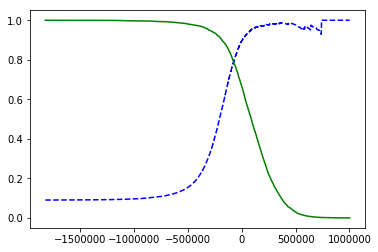

In [30]:
plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
auc_score = roc_auc_score(y_train_5, y_scores)
auc_score

0.9630198703085066

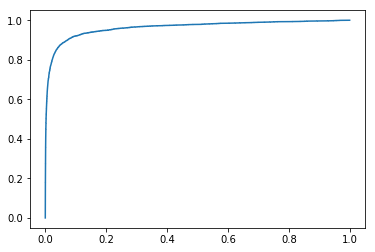

In [33]:
def plot_roc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    
plot_roc(fpr, tpr)

In [34]:
from sklearn.ensemble import RandomForestClassifier

fores_clf = RandomForestClassifier(random_state=42)
y_prob_forest = cross_val_predict(fores_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_prob_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


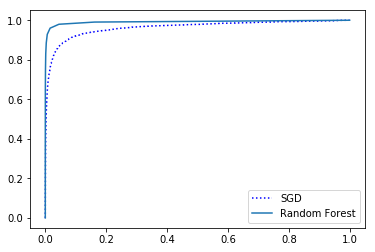

In [37]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
hyperparams = {"n_neighbors": np.arange(5, 6, 2),
              "metric": ["euclidean", "cityblock"], "n_jobs": [-1]}
kn_clf = KNeighborsClassifier(n_jobs=-1)
grid = GridSearchCV(kn_clf, hyperparams)
grid.fit(X_train, y_train)

# kn_scor = cross_val_score(grid, X_train, y_train)

C:\Users\yasse\Anaconda3\envs\homl\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([5]), 'metric': ['euclidean', 'cityblock'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}